In [2]:
import torch
from torch import nn
import os
import numpy as np
import math

In [ ]:

class NavigationNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.control_net = torch.nn.Sequential(
            torch.nn.Linear(6, 16),  # Input: [bot_x, bot_y, goal_x, goal_y, world_theta, relative_theta]
            torch.nn.ReLU(),
            torch.nn.Linear(16, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 2), # Output: [L, delta_theta]
            torch.nn.Tanh()  # Tanh activation for bounded output
        )
        
    def forward(self, current_state):
        return self.control_net(current_state)

# net = torch.load(r"nav_model.pth")


In [4]:
# torch.save(net.state_dict(), "ext_nav_model.pth")

In [4]:
model1 = torch.load(r"F:\Aerosim-Simulation-Zone\Try\mod_act_nav.pth")
for key in model1.state_dict():
    print(key)


features.0.weight
features.0.bias
features.2.weight
features.2.bias
features.4.weight
features.4.bias
linear_head.0.weight
linear_head.0.bias
linear_head.2.weight
linear_head.2.bias
linear_head.4.weight
linear_head.4.bias
angular_head.0.weight
angular_head.0.bias
angular_head.2.weight
angular_head.2.bias
angular_head.4.weight
angular_head.4.bias


C:\Users\rahat\AppData\Local\Temp\ipykernel_15460\2239639905.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(r"F:\Aerosim-Simulation-Zone\Try\mod_act

In [6]:
model2 = torch.load(r"F:\Aerosim-Simulation-Zone\TEST_FILES\New_final_bc_policy.pth")

for key,_ in model2['model_state_dict'].items():
    print(key)

_orig_mod.log_std
_orig_mod.mlp_extractor.policy_net.0.weight
_orig_mod.mlp_extractor.policy_net.0.bias
_orig_mod.mlp_extractor.policy_net.2.weight
_orig_mod.mlp_extractor.policy_net.2.bias
_orig_mod.mlp_extractor.policy_net.4.weight
_orig_mod.mlp_extractor.policy_net.4.bias
_orig_mod.mlp_extractor.policy_net.6.weight
_orig_mod.mlp_extractor.policy_net.6.bias
_orig_mod.action_net.weight
_orig_mod.action_net.bias
_orig_mod.value_net.weight
_orig_mod.value_net.bias


C:\Users\rahat\AppData\Local\Temp\ipykernel_37540\583094147.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2 = torch.load(r"F:\Aerosim-Simulation-Zone\TEST_FILES\N

In [7]:
# Create a mapping dictionary for the networks
mapping = {
    'control_net.0': 'mlp_extractor.policy_net.0',
    'control_net.2': 'mlp_extractor.policy_net.2',
    'control_net.4': 'mlp_extractor.policy_net.4',
    'control_net.6': 'mlp_extractor.policy_net.6',
    'control_net.8': 'mlp_extractor.policy_net.8',
    'control_net.10': 'action_net.0'
}

# Load both models
model1 = torch.load("Noise_Nav_Model.pth")
model2 = torch.load(r"F:\Aerosim-Simulation-Zone\TEST_FILES\final_bc_policy.pth")

# Create new state dict for model2
new_state_dict = {}

# Handle log_std - initialize it with small negative values for stable training
new_state_dict['log_std'] = torch.ones(model2['model_state_dict']['_orig_mod.log_std'].shape) * -2.0

# Transfer weights and remove '_orig_mod' prefix
for old_key, new_key in mapping.items():
    new_state_dict[f'{new_key}.weight'] = model1[f'{old_key}.weight']
    new_state_dict[f'{new_key}.bias'] = model1[f'{old_key}.bias']

# Save the updated model
torch.save({'model_state_dict': new_state_dict}, "updated_policy.pth")

model3 = torch.load("updated_policy.pth")

for key,_ in model3['model_state_dict'].items():
    print(key)


C:\Users\rahat\AppData\Local\Temp\ipykernel_37540\316882640.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load("Noise_Nav_Model.pth")
C:\Users\rahat\Ap

TypeError: 'NavigationNet' object is not subscriptable

In [11]:
import torch
import argparse

def load_mapped_policy(policy, ref_policy):
    """
    Loads an input policy provided via args, obtains its state dictionary,
    maps its weights to the target architecture, and returns the updated policy.
    
    Mapping:
        'control_net.0'   -> 'mlp_extractor.policy_net.0'
        'control_net.2'   -> 'mlp_extractor.policy_net.2'
        'control_net.4'   -> 'mlp_extractor.policy_net.4'
        'control_net.6'   -> 'mlp_extractor.policy_net.6'
        'control_net.8'   -> 'mlp_extractor.policy_net.8'
        'control_net.10'  -> 'action_net.0'
    
    Additionally, the log_std parameter is initialized with a small negative value.
    """
    # Define the mapping.
    mapping = {
        'control_net.0': 'mlp_extractor.policy_net.0',
        'control_net.2': 'mlp_extractor.policy_net.2',
        'control_net.4': 'mlp_extractor.policy_net.4',
        'control_net.6': 'mlp_extractor.policy_net.6',
        'control_net.8': 'mlp_extractor.policy_net.8',
        'control_net.10': 'action_net.0'
    }
    
    # Load the input policy.
    model1 = torch.load(policy, map_location=torch.device("cpu"))
    model2 = torch.load(ref_policy, map_location=torch.device("cpu"))
    
    # Get the state dict from the model.
    # If model1 is a PyTorch nn.Module, call state_dict(). Otherwise, assume it is already a dict.
    if hasattr(model1, 'state_dict'):
        source_state = model1.state_dict()
    else:
        source_state = model1

    new_state_dict = {}
    
    # Initialize log_std with a small negative value.
    # if '_orig_mod.log_std' in source_state:
    #     log_std_shape = source_state['_orig_mod.log_std'].shape
    # else:
    #     # As a fallback, use the shape of one of the layers.
    #     log_std_shape = source_state['control_net.0.weight'].shape
    # new_state_dict['log_std'] = torch.ones(log_std_shape) * -2.0
    new_state_dict['log_std'] = torch.ones(model2['model_state_dict']['_orig_mod.log_std'].shape) * -2.0

    # Transfer and remap weights.
    for old_key, new_key in mapping.items():
        new_state_dict[f'{new_key}.weight'] = source_state[f'{old_key}.weight']
        new_state_dict[f'{new_key}.bias'] = source_state[f'{old_key}.bias']

    # Save the updated policy.
    updated_policy_path = "updated_policy.pth"
    torch.save({'model_state_dict': new_state_dict}, updated_policy_path)
    print(f"Updated policy saved at {updated_policy_path}")
    
    # Optionally load it back for further usage.
    updated_policy = torch.load(updated_policy_path, map_location=torch.device("cpu"))
    print("Mapped policy keys:")
    for key in updated_policy['model_state_dict'].keys():
        print(key)
    
    return updated_policy

if __name__ == "__main__":
    # parser = argparse.ArgumentParser()
    # parser.add_argument('--policy', type=str, required=True, help="Path to input policy (.pth) file.")
    # args = parser.parse_args()
    policy = "Noise_Nav_Model.pth"
    ref_policy = r"F:\Aerosim-Simulation-Zone\TEST_FILES\New_final_bc_policy.pth"
    load_mapped_policy(policy, ref_policy)


Updated policy saved at updated_policy.pth
Mapped policy keys:
log_std
mlp_extractor.policy_net.0.weight
mlp_extractor.policy_net.0.bias
mlp_extractor.policy_net.2.weight
mlp_extractor.policy_net.2.bias
mlp_extractor.policy_net.4.weight
mlp_extractor.policy_net.4.bias
mlp_extractor.policy_net.6.weight
mlp_extractor.policy_net.6.bias
mlp_extractor.policy_net.8.weight
mlp_extractor.policy_net.8.bias
action_net.0.weight
action_net.0.bias


C:\Users\rahat\AppData\Local\Temp\ipykernel_37540\1552629445.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(policy, map_location=torch.device("cpu"

In [27]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [28]:
def get_lidar_points(binary_img, current_pos, world_limits, num_rays=360, max_range=4.0):
    """
    Get LiDAR first contact points in world coordinates using vectorized operations
    Args:
        binary_img: Binary image where 0 is obstacle, 1 is free space
        current_pos: (x,y) position of the sensor in world coordinates (a 1D array or list of 2 values)
        world_limits: Array of [[min_x, max_x], [min_y, max_y]] world boundaries
        num_rays: Number of rays to cast (default 360 for 1-degree resolution)
        max_range: Maximum range of the sensor in world units
    Returns:
        contact_points: Array of shape (num_rays, 2) with (x,y) coordinates relative to sensor position,
                        zeros for rays that don't hit anything
        lidar_dists: Array of shape (num_rays,) with the distance to the contact for each ray
    """
    height, width = binary_img.shape

    # Calculate transformation factors from world to image.
    world_width = world_limits[0][1] - world_limits[0][0]
    world_height = world_limits[1][1] - world_limits[1][0]
    scale_x = width / world_width
    scale_y = height / world_height

    # Convert world position to image coordinates.
    # Use the lower bounds: world_limits[0][0] for x and world_limits[1][0] for y.
    img_x = int(round((current_pos[0] - world_limits[0][0]) * scale_x))
    img_y = height - int(round((current_pos[1] - world_limits[1][0]) * scale_y))

    # Convert max_range to pixels.
    max_range_px = int(max_range * min(scale_x, scale_y))

    # Generate all angles at once.
    angles = np.linspace(0, 2 * np.pi, num_rays, endpoint=False)

    # Generate direction vectors for all angles.
    directions = np.stack([np.cos(angles), -np.sin(angles)], axis=0)  # Shape: (2, num_rays)

    # Generate all ray lengths at once.
    ray_lengths = np.arange(1, max_range_px)  # Shape: (max_range_px-1,)

    # Calculate all possible points for all rays using broadcasting.
    ray_points = ray_lengths[:, np.newaxis, np.newaxis] * directions[np.newaxis, :, :]
    ray_points = np.transpose(ray_points, (0, 2, 1))  # Reshape to (max_range_px-1, num_rays, 2)

    # Add sensor position to all points.
    ray_points_x = ray_points[..., 0] + img_x  # (max_range_px-1, num_rays)
    ray_points_y = ray_points[..., 1] + img_y

    # Convert to integer coordinates.
    ray_points_x = ray_points_x.astype(np.int32)
    ray_points_y = ray_points_y.astype(np.int32)

    # Create masks for valid points.
    valid_x = (ray_points_x >= 0) & (ray_points_x < width)
    valid_y = (ray_points_y >= 0) & (ray_points_y < height)
    valid_points = valid_x & valid_y

    # Initialize arrays to store contact points and distances.
    contact_points = np.zeros((num_rays, 2))
    lidar_dists = np.ones(num_rays) * np.inf

    # Find first contact point for each ray.
    for ray_idx in range(num_rays):
        valid_ray_points = valid_points[:, ray_idx]
        if not np.any(valid_ray_points):
            continue

        ray_x = ray_points_x[valid_ray_points, ray_idx]
        ray_y = ray_points_y[valid_ray_points, ray_idx]

        # Check for obstacles along the ray.
        ray_values = binary_img[ray_y, ray_x]
        obstacle_indices = np.where(ray_values == 0)[0]

        if len(obstacle_indices) > 0:
            # Get first contact point.
            first_contact_idx = obstacle_indices[0]
            px = ray_x[first_contact_idx]
            py = ray_y[first_contact_idx]

            # Convert back to world coordinates.
            # Adding a 0.5 offset so we convert from pixel centers.
            world_x = ((px + 0.5) / scale_x) + world_limits[0][0]
            world_y = world_limits[1][0] + ((height - (py + 0.5)) / scale_y)

            # Calculate relative coordinates from the sensor's current position.
            rel_x = world_x - current_pos[0]
            rel_y = world_y - current_pos[1]
            dist = np.sqrt(rel_x**2 + rel_y**2)

            if dist <= max_range:
                contact_points[ray_idx] = [rel_x, rel_y]
                lidar_dists[ray_idx] = dist

    return contact_points, lidar_dists

In [29]:
def adjust_actions(lidar_points, proposed_action, n, debug=False):
    """
    Adjust the proposed (L, θ) action to avoid collisions and move into the closest free space.
    
    This function takes the LiDAR scan data (batch, 360) and a proposed action (batch, 2) provided
    in normalized units (both values between -1 and 1). The linear component (L) is interpreted as 
    L * max_step_size, and the angular component (θ) as θ * max_theta (in radians), where we assume:
        max_step_size = 1.0  (agent's maximum displacement per step)
        max_theta = π       (so that a normalized value of ±1 corresponds to ±π radians)
    
    For each sample in the batch, the function examines the LiDAR readings in a safety window of ±n 
    degrees around the current proposed angle (converted to degrees) to determine if the proposed 
    linear displacement would lead to a collision (i.e. if an obstacle is closer than the intended move).
    
    If a collision is predicted, the function searches over candidate angles (in a broader range, e.g. ±30°)
    for the direction closest to the original that is free (i.e. whose window has a higher obstacle distance).
    It then sets the new linear action to be the minimum of the original and (the candidate's safe distance 
    multiplied by a margin) and returns the adjusted action in normalized units.
    
    Args:
        lidar_points (np.ndarray): Array of shape (batch, 360) with LiDAR distances.
        proposed_action (np.ndarray): Array of shape (batch,2) with normalized action values in [-1,1]
                                        for [linear, angular] displacement.
        n (int): Safety margin in degrees for collision checking (±n).
        debug (bool): If True, prints debug statements.
    
    Returns:
        np.ndarray: Adjusted action of shape (batch, 2) with normalized values in [-1,1].
    """
    if debug:
        # print("DEBUG: Entering adjust_actions")
        print(f"DEBUG: Initial proposed_action: {proposed_action}")

    # If the proposed_action is 1-dimensional, expand its dimensions.
    was_single_action = False
    if proposed_action.ndim == 1:
        # if debug:
            # print("DEBUG: Detected 1D proposed_action. Expanding dimensions.")
        proposed_action = np.expand_dims(proposed_action, axis=0)
        was_single_action = True
    # if debug:
        # print(f"DEBUG: was_single_action: {was_single_action}")
        # print(f"DEBUG: proposed_action shape after potential expansion: {proposed_action.shape}")

    # Environment constants.
    max_step_size = 1.0  # Actual maximum displacement (units)
    max_theta = np.pi    # Maximum angular change in radians (normalized value ±1)
    # if debug:
        # print(f"DEBUG: max_step_size = {max_step_size}, max_theta = {max_theta}")

    batch_size = proposed_action.shape[0]
    new_action = proposed_action.copy()
    # if debug:
        # print(f"DEBUG: Batch size: {batch_size}")
        # print(f"DEBUG: new_action initialized as: {new_action}")

    # Convert normalized actions to actual environment values.
    # Actual linear displacement (taking absolute value to assess distance).
    actual_L = np.abs(proposed_action[:, 0]) * max_step_size
    if debug:
        print(f"DEBUG: Computed actual_L: {actual_L}")

    # Actual angular displacement in radians.
    actual_theta_rad = proposed_action[:, 1] * max_theta  
    # if debug:
        # print(f"DEBUG: Computed actual_theta_rad: {actual_theta_rad}")

    # Convert angle to degrees (0-360).
    actual_theta_deg = (np.rad2deg(actual_theta_rad)) % 360
    if debug:
        print(f"DEBUG: Computed actual_theta_deg: {actual_theta_deg}")

    # Expand lidar_points to include batch dimension if needed.
    lidar_points = lidar_points[np.newaxis, :]
    # if debug:
        # print(f"DEBUG: lidar_points shape after adding new axis: {lidar_points.shape}")

    # Loop over each sample (usually batch size is 1).
    for i in range(batch_size):
        if debug:
            print(f"DEBUG: Processing sample {i}")
        # Define a narrow safety window ±n degrees around the proposed angle.
        window_offsets = np.arange(-n, n + 1)
        if debug:
            print(f"DEBUG: window_offsets: {window_offsets}")

        proposal_angle = np.round(actual_theta_deg[i]).astype(int)  # integer version of proposed angle.
        if debug:
            print(f"DEBUG: Sample {i} proposal_angle: {proposal_angle}")

        indices = (proposal_angle + window_offsets) % 360
        if debug:
            print(f"DEBUG: Sample {i} safety window indices: {indices}")

        readings = lidar_points[i, indices]
        if debug:
            print(f"DEBUG: Sample {i} LiDAR readings in safety window: {readings}")
            # print(f"DEBUG: Sample {i} Proposed linear displacement (actual_L): {actual_L[i]}")

        # The proposed action would be unsafe if any reading in the safety window
        # is less than or equal to the intended displacement.
        if (readings <= max_step_size*1.5).any():
            if debug:
                print(f"DEBUG: Sample {i}: Proposed action is unsafe.")
            # Search for candidate angles in a broader range (e.g. ±n degrees) to find a free path.
            candidate_range = np.arange(-n, n+1)
            candidate_angles = (proposal_angle + candidate_range) % 360
            if debug:
                print(f"DEBUG: Sample {i}: candidate_range: {candidate_range}")
                print(f"DEBUG: Sample {i}: candidate_angles: {candidate_angles}")
            best_candidate = None
            best_diff = 360  # Initialize with maximum possible angular difference.
            candidate_safe_distance = 0
            
            # For each candidate, evaluate its safety using a narrow window (±n).
            for cand in candidate_angles:
                cand_indices = (cand + window_offsets) % 360
                cand_readings = lidar_points[i, cand_indices]
                cand_safe_dist = np.min(cand_readings)
                diff_angle = min(abs(cand - actual_theta_deg[i]), 360 - abs(cand - actual_theta_deg[i]))
                if debug:
                    print(f"DEBUG: Sample {i}: Evaluating candidate angle {cand}:")
                    print(f"       cand_indices: {cand_indices}")
                    print(f"       cand_readings: {cand_readings}")
                    print(f"       cand_safe_dist: {cand_safe_dist}, diff_angle: {diff_angle}")
                # Choose candidate if it has some free space and is closer in angle to the original.
                if (cand_safe_dist > 0 and cand_safe_dist >= (max_step_size - 1e-2)) and diff_angle < best_diff:
                    best_diff = diff_angle
                    best_candidate = cand
                    candidate_safe_distance = cand_safe_dist
                    if debug:
                        print(f"DEBUG: Sample {i}: New best candidate found: {cand} with diff {best_diff} and safe distance {cand_safe_dist}")

            # If no candidate is found, fallback by reducing the linear displacement.
            if best_candidate is None:
                new_actual_L = actual_L[i] * 0.5
                new_actual_theta_deg = actual_theta_deg[i]
                if debug:
                    print(f"DEBUG: Sample {i}: No free candidate found; halving L to {new_actual_L}.")
            else:
                new_actual_theta_deg = best_candidate
                margin = 0.9  # Safety margin: do not use the full available free distance.
                new_actual_L = min(actual_L[i], candidate_safe_distance * margin)
                if debug:
                    print(f"DEBUG: Sample {i}: Candidate angle {best_candidate}° selected with safe distance {candidate_safe_distance}.")
                    print(f"DEBUG: Sample {i}: New linear displacement set to {new_actual_L}.")
            
            # Update the action in normalized units.
            new_action[i, 0] = np.clip(new_actual_L / max_step_size, -1, 1)
            new_theta_rad = np.deg2rad(new_actual_theta_deg)
            new_action[i, 1] = np.clip(new_theta_rad / max_theta, -1, 1)
            if debug:
                print(f"DEBUG: Sample {i}: Updated action: linear = {new_action[i, 0]}, angular (normalized) = {new_action[i, 1]}")
        elif (readings <= max_step_size*3).any():
            new_action[i, 0] = actual_L/2
            if debug:
                print(f"DEBUG: Sample {i}: Proposed action is safe but L is halved {new_action[i, 0]}")
        else:
            if debug:
                print(f"DEBUG: Sample {i}: Proposed action is safe.")
                pass

    # If the input was a single action (1D), return a 1D array.
    if was_single_action:
        if debug:
            print(f"DEBUG: Returning single action: {new_action[0]}")
        return new_action[0]

    if debug:
        print(f"DEBUG: Returning batch of actions: {new_action}")
        print("DEBUG: Exiting adjust_actions")
    return new_action

In [47]:
def plot_trajectory(net, initial_pos, goal_pos, bin_img, max_steps=12):
    """
    Simulate and plot the trajectory of the agent.
    
    At each step:
      - Obtain LiDAR readings (using get_lidar_points).
      - Compute network outputs and adjust actions if needed.
      - Update the agent's position and orientation.
      - Save the agent position and LiDAR contact points.
    
    After the simulation, the function plots:
      - The trajectory (path).
      - The start and goal positions.
      - The LiDAR contact points (in orange) for every step.
    """
    with torch.no_grad():
        current_pos = initial_pos.clone()
        goal_pos = goal_pos.clone()
        theta = torch.zeros_like(current_pos[0])
        positions = []
        lidar_steps = []  # List to keep LiDAR contacts (absolute positions) per step

        for stp in range(max_steps):
            # Convert current position to a numpy array (shape: [x,y]) before passing to get_lidar_points.
            current_pos_np = current_pos.cpu().numpy()
            lidar_pts, lidar_dists = get_lidar_points(
                binary_img=bin_img,
                current_pos=current_pos_np,
                world_limits=np.array([[-10, 10], [-8, 8]])
            )
            # Compute absolute LiDAR contact positions by adding the sensor's current position.
            abs_lidar_pts = lidar_pts + current_pos_np
            lidar_steps.append(abs_lidar_pts)

            delta_pos = goal_pos - current_pos
            relative_theta = torch.atan2(delta_pos[1], delta_pos[0]) - theta
            relative_theta = (relative_theta + np.pi) % (2 * np.pi) - np.pi

            print(np.array([current_pos[0]/10, current_pos[1]/7]),
                  np.array([goal_pos[0]/10, goal_pos[1]/7]),
                  np.array([theta.item()/np.pi, relative_theta.item()/np.pi]))

            net_input = torch.stack([
                current_pos[0]/10, current_pos[1]/7,
                goal_pos[0]/10, goal_pos[1]/7,
                theta/np.pi, relative_theta/np.pi
            ], dim=-1).unsqueeze(0)

            controls = net(net_input)[0]
            L = controls[0]
            delta_theta = controls[1] * np.pi

            # (Optional) adjust the control with the LiDAR-based action correction.
            new_act = adjust_actions(lidar_dists, controls, n=5, debug=False)

            # Update the heading angle.
            theta = theta + delta_theta
            theta = (theta + np.pi) % (2 * np.pi) - np.pi

            # Calculate the movement vector.
            movement = torch.stack([
                L * torch.cos(theta),
                L * torch.sin(theta)
            ])
            current_pos += movement
            positions.append(current_pos.cpu().numpy().copy())
            print(f"Actions: {L.item(), delta_theta.item()/np.pi}")

            if torch.norm(delta_pos) < 0.1:
                break

        positions = np.array(positions)
        plt.figure(figsize=(8, 6))

        # Plot the trajectory.
        plt.plot(positions[:, 0], positions[:, 1], 'b-o', markersize=4, label='Path')
        plt.scatter(positions[0, 0], positions[0, 1], c='green', s=200, marker='*', label='Start')
        plt.scatter(goal_pos[0].item(), goal_pos[1].item(), c='red', s=200, marker='X', label='Goal')

        # Plot LiDAR contacts for each step using the absolute LiDAR positions.
        first = True
        for lidar in lidar_steps:
            if first:
                plt.scatter(lidar[:, 0], lidar[:, 1],
                            c='orange', s=5, alpha=0.5, label='LiDAR')
                first = False
            else:
                plt.scatter(lidar[:, 0], lidar[:, 1],
                            c='orange', s=5, alpha=0.5)
        # Ensure the legend has only one 'LiDAR' label.
        handles, labels = plt.gca().get_legend_handles_labels()
        unique = dict(zip(labels, handles))
        plt.legend(unique.values(), unique.keys())

        plt.title("Navigation Trajectory with LiDAR Contacts")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.axis('equal')
        plt.show()

In [50]:
def animate_trajectory_with_slider(net, initial_pos, goal_pos, bin_img, max_steps=12):
    """
    Simulate the agent's trajectory and create an interactive animation using Plotly.
    
    The animation displays:
      - The cumulative agent's path as a blue line.
      - The start (green star) and goal (red X) markers.
      - The LiDAR contact points (orange markers) at each simulation step.
    
    To avoid nbformat-related errors, we force Plotly to use the "browser" renderer.
    """
    import plotly.graph_objects as go
    import plotly.io as pio
    import numpy as np
    import torch
    
    # Force the Plotly renderer to "browser" to avoid nbformat issues.
    pio.renderers.default = "browser"
    
    # --- Simulation Phase: Collect trajectory and LiDAR data ---
    with torch.no_grad():
        current_pos = initial_pos.clone()
        goal_pos = goal_pos.clone()
        theta = torch.zeros_like(current_pos[0])
        positions = []     # Store agent positions at each step
        lidar_steps = []   # Store absolute LiDAR positions (per step)
    
        for stp in range(max_steps):
            # Convert the current position to a NumPy array.
            current_pos_np = current_pos.cpu().numpy()
            lidar_pts, lidar_dists = get_lidar_points(
                binary_img=bin_img,
                current_pos=current_pos_np,
                world_limits=np.array([[-10, 10], [-8, 8]])
            )
            # Absolute LiDAR positions: shift relative readings by the agent position.
            abs_lidar_pts = lidar_pts + current_pos_np
            lidar_steps.append(abs_lidar_pts)
    
            delta_pos = goal_pos - current_pos
            relative_theta = torch.atan2(delta_pos[1], delta_pos[0]) - theta
            relative_theta = (relative_theta + np.pi) % (2 * np.pi) - np.pi
    
            net_input = torch.stack([
                current_pos[0] / 10, current_pos[1] / 7,
                goal_pos[0] / 10, goal_pos[1] / 7,
                theta / np.pi, relative_theta / np.pi
            ], dim=-1).unsqueeze(0)
    
            controls = net(net_input)[0]
            L = controls[0]
            delta_theta = controls[1] * np.pi
    
            # (Optional) adjust the control using LiDAR-based correction.
            new_act = adjust_actions(lidar_dists, controls, n=5, debug=False)
    
            # Update heading and position.
            theta = theta + delta_theta
            theta = (theta + np.pi) % (2 * np.pi) - np.pi
            movement = torch.stack([L * torch.cos(theta), L * torch.sin(theta)])
            current_pos += movement
            positions.append(current_pos.cpu().numpy().copy())
    
            if torch.norm(delta_pos) < 0.1:
                break
    
    positions = np.array(positions)
    n_frames = len(positions)
    
    # Determine plot boundaries.
    margin = 1.0
    x_min = min(np.min(positions[:, 0]), goal_pos[0].item(), initial_pos[0].item()) - margin
    x_max = max(np.max(positions[:, 0]), goal_pos[0].item(), initial_pos[0].item()) + margin
    y_min = min(np.min(positions[:, 1]), goal_pos[1].item(), initial_pos[1].item()) - margin
    y_max = max(np.max(positions[:, 1]), goal_pos[1].item(), initial_pos[1].item()) + margin
    
    # Define initial traces.
    path_trace = go.Scatter(
        x=positions[:1, 0],
        y=positions[:1, 1],
        mode='lines+markers',
        line=dict(color='blue'),
        name='Path'
    )
    start_trace = go.Scatter(
        x=[initial_pos[0].item()],
        y=[initial_pos[1].item()],
        mode='markers',
        marker=dict(color='green', size=15, symbol='star'),
        name='Start'
    )
    goal_trace = go.Scatter(
        x=[goal_pos[0].item()],
        y=[goal_pos[1].item()],
        mode='markers',
        marker=dict(color='red', size=15, symbol='x'),
        name='Goal'
    )
    lidar_trace = go.Scatter(
        x=lidar_steps[0][:, 0],
        y=lidar_steps[0][:, 1],
        mode='markers',
        marker=dict(color='orange', size=5),
        name='LiDAR'
    )
    
    # Build animation frames.
    frames = []
    for i in range(n_frames):
        frame_data = [
            go.Scatter(
                x=positions[:i+1, 0],
                y=positions[:i+1, 1],
                mode='lines+markers',
                line=dict(color='blue')
            ),
            go.Scatter(
                x=[initial_pos[0].item()],
                y=[initial_pos[1].item()],
                mode='markers',
                marker=dict(color='green', size=15, symbol='star')
            ),
            go.Scatter(
                x=[goal_pos[0].item()],
                y=[goal_pos[1].item()],
                mode='markers',
                marker=dict(color='red', size=15, symbol='x')
            ),
            go.Scatter(
                x=lidar_steps[i][:, 0],
                y=lidar_steps[i][:, 1],
                mode='markers',
                marker=dict(color='orange', size=5)
            )
        ]
        frames.append(go.Frame(data=frame_data, name=str(i)))
    
    # Create slider steps.
    slider_steps = []
    for i in range(n_frames):
        slider_steps.append({
            "args": [[str(i)],
                     {"frame": {"duration": 500, "redraw": True},
                      "mode": "immediate",
                      "transition": {"duration": 0}}],
            "label": str(i),
            "method": "animate"
        })
    
    # Construct the figure.
    fig = go.Figure(
        data=[path_trace, start_trace, goal_trace, lidar_trace],
        layout=go.Layout(
            title="Agent Trajectory with LiDAR Contacts",
            xaxis=dict(range=[x_min, x_max], title="X"),
            yaxis=dict(range=[y_min, y_max], title="Y"),
            updatemenus=[{
                "type": "buttons",
                "buttons": [{
                    "label": "Play",
                    "method": "animate",
                    "args": [None, {"frame": {"duration": 500, "redraw": True},
                                    "fromcurrent": True,
                                    "transition": {"duration": 0}}],
                }]
            }],
            sliders=[{
                "active": 0,
                "steps": slider_steps,
                "currentvalue": {"prefix": "Step: "},
            }]
        ),
        frames=frames
    )
    
    fig.show()

In [51]:
image_path = r"F:\Aerosim-Simulation-Zone\TEST_FILES\New_WR_World.png"
img = np.array(Image.open(image_path).convert('L'))  # Convert to grayscale
bin_img = (img > 128).astype(np.uint8)  # Threshold to create a binary map
bin_img = cv2.resize(bin_img, (0,0), fx=0.25, fy=0.25)

with torch.no_grad():
    initial_torch = torch.tensor([5, -3], dtype=torch.float32)
    goal_torch = torch.tensor([0, -3], dtype=torch.float32)
    animate_trajectory_with_slider(net, initial_torch, goal_torch, bin_img, 60)

C:\Users\rahat\AppData\Local\Temp\ipykernel_38352\3389537835.py:155: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [1]:
import torch

In [14]:
a = torch.tensor([-20.0, 10.0])
torch.nn.functional.softmin(a)

C:\Users\rahat\AppData\Local\Temp\ipykernel_33692\19126482.py:2: UserWarning: Implicit dimension choice for softmin has been deprecated. Change the call to include dim=X as an argument.
  torch.nn.functional.softmin(a)


tensor([1.0000e+00, 9.3576e-14])

In [23]:
import numpy as np
deg = np.array([390, 270])
rad = np.deg2rad(deg)
diff = np.ones(deg.shape[0])*(-np.pi/2) - rad
print(f"deg : {deg}, rad: {rad}, diff: {diff}, abs_diff: {np.abs(diff)}")

deg : [390 270], rad: [6.80678408 4.71238898], diff: [-8.37758041 -6.28318531], abs_diff: [8.37758041 6.28318531]


In [8]:
import numpy as np

a = np.array([3, 5, np.inf])
print(a)
ind = np.isinf(a)
print(ind)
sfd = a > 3.2
print(sfd)
fidx = sfd & (~ind)
print(fidx)


[ 3.  5. inf]
[False False  True]
[False  True  True]
[False  True False]


In [12]:
np.sqrt(np.power(14,2) + np.power(18,2))

22.80350850198276

In [11]:
a1 = np.rad2deg(0.42)
a2 = np.rad2deg(0.43)
a3 = np.rad2deg(0.44)
print(f"ai: {a1}, a2: {a2}, a3: {a3}")

ai: 24.064227395494576, a2: 24.6371851906254, a3: 25.21014298575622


In [250]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[ True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

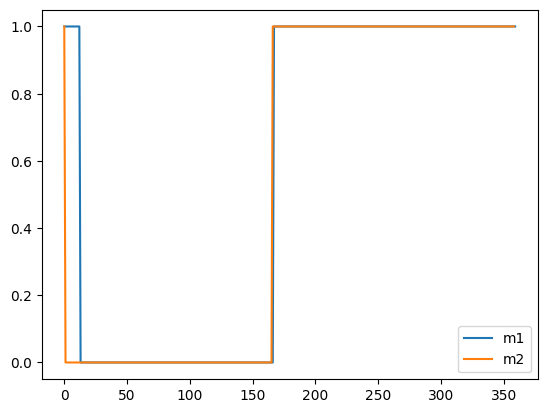

In [255]:
from LiDAR_Fast import *
from PIL import Image
import numpy as np
from Lidar_Model_Enc import *

def get_safe_mask_1(lidar_dists, threshold, num_rays=360, window_size=5):
    
    scan = np.asarray(lidar_dists)
    
    if len(scan.shape) > 1 and scan.shape[1] != num_rays:
        scan = scan[:, :num_rays]
    
    finite_mask = (scan > threshold)
    return finite_mask

image_path = r"F:\Aerosim-Simulation-Zone\Try\New_WR_World.png"
img = np.array(Image.open(image_path).convert('L'))
binary_img = (img > 128).astype(np.uint8)
binary_img = cv2.resize(binary_img, (0,0), fx=0.25, fy=0.25)

batch_size = 1

c_pos = np.array([-3.25, 5.8])
world_limits = np.array([[-10, 10], [-8, 8]])

lp, ld = get_lidar_points(binary_img, c_pos, world_limits)
ld_1 = ld[np.newaxis, :]

mask_1 = get_safe_mask_1(ld, 3)
mask_2 = get_safe_mask(ld_1, threshold=3, window_size=12)

print(mask_1)
print(mask_2)

# plt.plot(mask[0], label='m1')
plt.plot(mask_1, label='m1')
plt.plot(mask_2.flatten(), label='m2')
plt.legend()

tensor([200.])
safe weights : torch.Size([1, 360])
safe Probs : torch.Size([1, 360])
theta safe: tensor([197.])
confidence: 0.25
Orifinal L: tensor([0.]), Original Theta: tensor([200.])
final L: tensor([0.]), final theta: tensor([197.7500]), final theta JUST: tensor([197.])
Difference Blended: tensor([-2.2500]), Difference: tensor([-3.0000])


tensor([[0.0000, 3.4514]])

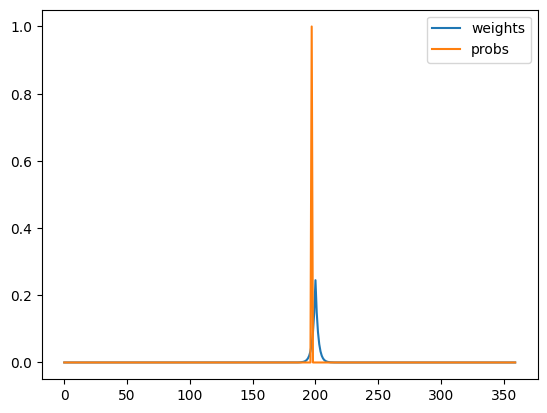

In [224]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

dist_trmp = nn.Parameter(torch.tensor(1.0))
distance_temp = torch.tensor(2)

# raw_output = features(state)
# L = torch.sigmoid(raw_output[:, 0])  # [0,1] magnitude
# theta_raw = raw_output[:, 1] * torch.pi  # [-π, π]

raw_output = torch.tensor([[0, 200/360]])
L = raw_output[:, 0]  # [0,1] magnitude
theta_raw = (raw_output[:, 1] * 2*torch.pi) % (2*np.pi)  # [-π, π]

# Convert to angular bins [0, angular_res)
# theta_bin = np.rad2deg((theta_raw + torch.pi) % (2 * torch.pi) - torch.pi)
theta_bin = np.rad2deg(theta_raw) % 360
# --- Differentiable Nearest Safe Angle Selection ---
print(theta_bin)
# 1. Create distance matrix
all_bins = torch.arange(360)
bin_distances = torch.abs(all_bins.float() - theta_bin.unsqueeze(-1))
# print(bin_distances[35:56])
# print(f"Bin distances shape: {bin_distances.shape}")
# plt.plot(bin_distances.flatten(), label='bin_distances')

# 2. Apply safety mask and distance weighting
safe_weights = F.softmax(-bin_distances / distance_temp, dim=-1)
safe_weights = safe_weights * mask  # Zero out unsafe

print(f"safe weights : {safe_weights.shape}")
plt.plot(safe_weights.flatten(), label='weights')

# 3. Differentiable nearest selection (Gumbel-softmax)
safe_probs = F.gumbel_softmax(safe_weights.log(), tau=0.5, hard=True)

print(f"safe Probs : {safe_probs.shape}")
plt.plot(safe_probs.flatten(), label='probs')

# 4. Get nearest safe angle
nearest_bin = torch.argmax(safe_probs, dim=-1)
theta_safe_deg = (nearest_bin.float())
theta_safe = torch.deg2rad(theta_safe_deg)

print(f"theta safe: {np.rad2deg(theta_safe)}")

# 5. Blend with raw angle using distance confidence
confidence = 1 / (1 + bin_distances.gather(-1, nearest_bin.unsqueeze(-1)).squeeze())
final_theta = confidence * theta_raw + (1 - confidence) * theta_safe
final_theta_just = theta_safe

print(f"confidence: {confidence}")
print(f"Orifinal L: {L}, Original Theta: {np.rad2deg(theta_raw)}")
print(f"final L: {L}, final theta: {np.rad2deg(final_theta)}, final theta JUST: {np.rad2deg(final_theta_just)}")
print(f"Difference Blended: {np.rad2deg(((final_theta - theta_raw)))}, Difference: {np.rad2deg(((final_theta_just - theta_raw)))}")
plt.legend()

torch.stack([L, final_theta], dim=1)

In [144]:
import numpy as np

a = np.rad2deg(-3.43)
a

-196.52452372987239

In [4]:
class NavigationNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Change input dimension from 6 to 12
        self.features = torch.nn.Sequential(
            torch.nn.Linear(6, 16),  # New input: [bot_x, bot_y, goal_x, goal_y, world_theta, relative_theta]
            torch.nn.ReLU(),
            torch.nn.Linear(16, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU()
        )
        self.linear_head = torch.nn.Sequential(
            # torch.nn.Linear(64, 32),
            # torch.nn.ReLU(),
            # torch.nn.Linear(32, 16),
            # torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()  # L will be in [0,1]
        )
        self.angular_head = torch.nn.Sequential(
            # torch.nn.Linear(64, 32),
            # torch.nn.ReLU(),
            # torch.nn.Linear(32, 16),
            # torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()  # delta_theta will be in [0,1]
        )
        # self.distance_temp = nn.Parameter(torch.tensor(2.0))
        self.distance_temp = torch.tensor(2)

    def forward(self, state, safe_angle_mask):
        """
        state: [batch_size, 6] (input features)
        safe_angle_mask: [batch_size, angular_res] (1=safe, 0=unsafe)
        """
        # Base policy output
        # print(f"state shape: {state.shape}")
        raw_output = self.features(state)

        L = self.linear_head(raw_output)  # [0,1] magnitude
        theta_raw = (self.angular_head(raw_output) * (2 * torch.pi)) % (2 * torch.pi)  # [0, 2π]

        # print(f"MODEL: Theta_Raw: {torch.rad2deg(theta_raw)}")
        # Convert to angular bins [0, angular_res)
        # theta_deg = torch.rad2deg(theta_raw + torch.pi) % 360
        theta_deg = torch.rad2deg(theta_raw)
        theta_bin = theta_deg.long()
        # --- Differentiable Nearest Safe Angle Selection ---
        # 1. Create distance matrix
        all_bins = torch.arange(360, device=state.device)
        bin_distances = torch.abs(all_bins.float() - theta_bin)
        # print(f"Bin distances: {bin_distances}")
        
        # 2. Apply safety mask and distance weighting
        safe_weights = F.softmax(-bin_distances / self.distance_temp, dim=-1)
        # print(f"Safe weights: {safe_weights}")
        # plt.plot(safe_weights.detach().cpu().numpy().flatten(), label='weights')
        # plt.show()

        safe_weights = safe_weights * safe_angle_mask  # Zero out unsafe
        # print(f"safe weights : {safe_weights.shape}")

        # 3. Differentiable nearest selection (Gumbel-softmax)
        safe_probs = F.gumbel_softmax(safe_weights.log(), tau=0.5, hard=True)
        # print(f"safe Probs : {safe_probs.shape}")

        # 4. Get nearest safe angle
        nearest_bin = torch.argmax(safe_probs, dim=-1)
        theta_safe_deg = (nearest_bin.float())
        theta_safe = torch.deg2rad(theta_safe_deg)
        # print(f"theta safe: {theta_safe.shape}")
        # print(f"theta raw: {theta_raw.shape}")
    
        # 5. Blend with raw angle using distance confidence
        confidence = 1 / (1 + bin_distances.gather(-1, nearest_bin.unsqueeze(-1)).squeeze())
        final_theta = confidence * theta_raw.squeeze() + (1 - confidence) * theta_safe
        # print(f"MODEL: Theta_Final: {torch.rad2deg(final_theta)}")
        # print(f"MODEL: Difference: {torch.rad2deg(final_theta - theta_raw)}")

        # plt.plot(bin_distances[0].cpu().numpy().flatten())
        # plt.plot(safe_weights.detach().cpu().numpy().flatten(), label='weights')
        # plt.plot(safe_probs.detach().cpu().numpy().flatten(), label='probs')
        # plt.plot(safe_weights.detach().cpu().numpy().flatten(), label='weights')
        # plt.show()

        # print(f"confidence: {confidence.shape}")
        # print(f"L final: {L.shape}")
        # print(f"theta final: {final_theta.shape}")



        return torch.stack([L.squeeze(-1), final_theta], dim=-1), torch.stack([L.squeeze(-1), theta_raw.squeeze(-1)], dim=-1) 

In [11]:
import torch

model_path = r"F:\Aerosim-Simulation-Zone\Try\FIGS_Bound\checkpoint_epoch_500.pth"
model = torch.load(model_path, weights_only=False)

print(model)
for k in model.state_dict().keys():
    print(k)

NavigationNet(
  (features): Sequential(
    (0): Linear(in_features=6, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=16, bias=True)
    (9): ReLU()
  )
  (linear_head): Sequential(
    (0): Linear(in_features=16, out_features=1, bias=True)
    (1): Sigmoid()
  )
  (angular_head): Sequential(
    (0): Linear(in_features=16, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
features.0.weight
features.0.bias
features.2.weight
features.2.bias
features.4.weight
features.4.bias
features.6.weight
features.6.bias
features.8.weight
features.8.bias
linear_head.0.weight
linear_head.0.bias
angular_head.0.weight
angular_head.0.bias
